<a href="https://colab.research.google.com/github/ajayrfhp/LearningDeepLearning/blob/main/optimization_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install d2l
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l
from matplotlib import pyplot as plt

- Goal of optimization is to reduce error on finite train datasets
- Goal of deep learning is to reduce generalization error on unseen examples

## Optimization challenges
- Function at point is lower than its neighorhood, Minima, Second order gradient positive
- Function at point is higher than neighorhood, Maxima, Second order gradient negative.
- Saddle points can have minimas in some dimensions, maximas in some dimensions. Gradients will be zero

## Puzzle
Assume that you want to balance a (real) ball on a (real) saddle. Why is this hard? Can you exploit this effect also for optimization algorithms?
- Random balance will not cut it, starting points matter, smaller steps in some directions could be helpful especially as system converges.




### Vanishing gradient because of nature of activation function

- Vanishing gradient in tanh is described below

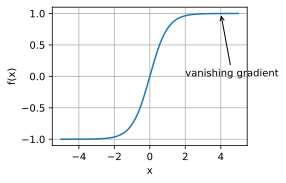

In [37]:
def annotate(text, xy, xytext):
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(arrowstyle='->'))

x = torch.arange(-5.0, 5.0, 0.01)
d2l.plot(x, [torch.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradient', (4, 1), (2, 0.0))
plt.show()

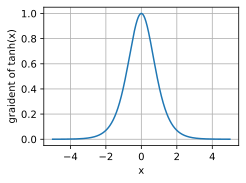

In [38]:
x_cords = torch.arange(-5.0, 5.0, 0.01)
y_cords = torch.tanh(x_cords)
grads = torch.gradient(y_cords, spacing=(x_cords,))
d2l.plot(x_cords, grads, 'x', 'graident of tanh(x)')

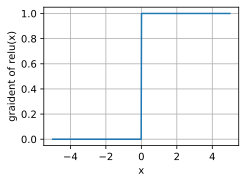

In [39]:
x_cords = torch.arange(-5.0, 5.0, 0.01)
y_cords = torch.relu(x_cords)
grads = torch.gradient(y_cords, spacing=(x_cords,))
d2l.plot(x_cords, grads, 'x', 'graident of relu(x)')

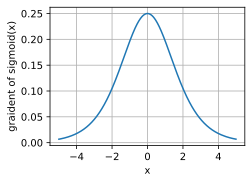

In [40]:
x_cords = torch.arange(-5.0, 5.0, 0.01)
y_cords = torch.sigmoid(x_cords)
grads = torch.gradient(y_cords, spacing=(x_cords,))
d2l.plot(x_cords, grads, 'x', 'graident of sigmoid(x)')

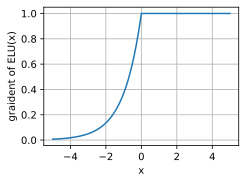

In [42]:
x_cords = torch.arange(-5.0, 5.0, 0.01)
y_cords = torch.nn.ELU()(x_cords)
grads = torch.gradient(y_cords, spacing=(x_cords,))
d2l.plot(x_cords, grads, 'x', 'graident of ELU(x)')

### Convex sets
- Set X is convex, if for all points a,b, line segment connecting A and B are included in the set.

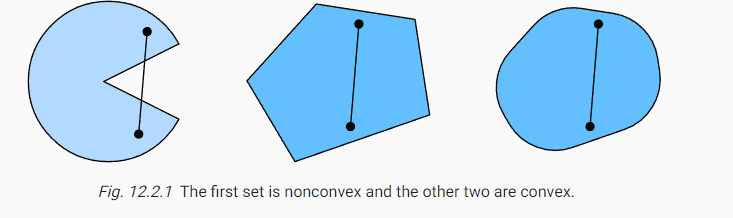

### Convex function
- Line is above the curve, for all points a, b and c
  - $c*f(a) + (1-c)*f(b) >= f(c*a+(1-c)*b)$

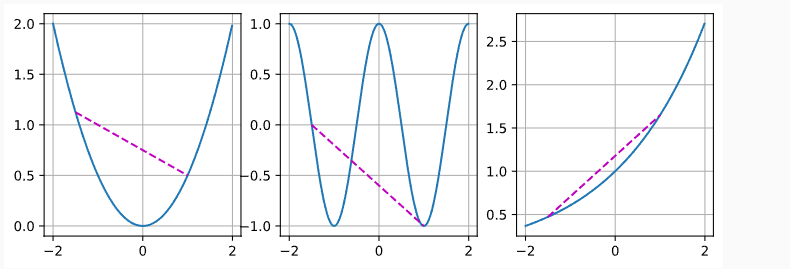



### Jensen's inequality
- For a convex function f, the e(f(x)) >= f(e(x)). It is a generalization of the convexity of functions. The right hand side is a simpler expression and optimization can be easier by maximizing the lower bound in variational inference

### Properties of convex functions
- Local minima are global minima
- Second derivative is greater than 0 for a convex function.
- Easy constrained optimization

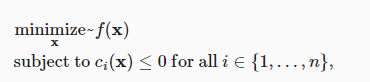

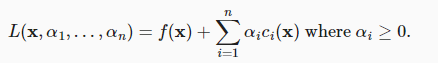


- For convex functions, you can can satisfy constraints by finding a closest vector in a projected space that you understand best.

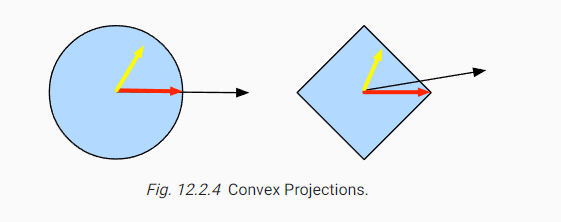

### Why does gradient descent make function smaller ?
- Because of taylor expansion. $F(x+e) = F(x) + eF'(x) + O(e**2)$
- If e = -nF'(x), Then $F(x-nF'(x)) = F(x) - F'(x)**2$, $-F(x+nF'(x))  F(x) >= 0$. New values are smaller